This notebook is started with the intention of looking at time dependance. It was created after the new hdf5 datascructure was created.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import pandas as pd
import datetime

sys.path.insert(0, '../../drlib')
import drlib as dr

%matplotlib widget

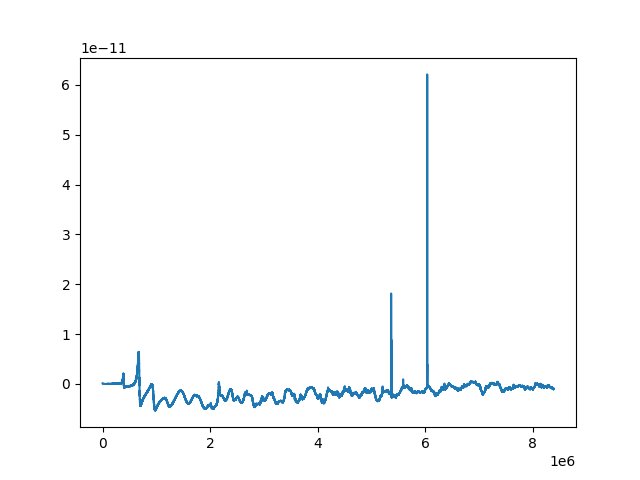

In [2]:
antData     = np.load('run1_antData_avgAll11776Spectra_gitignore.npy')
termData    = np.load('run1_termData_avgAll11776Spectra_gitignore.npy')
diffData    = dr.fft2Watts(antData) - dr.fft2Watts(termData)

plt.close('all')
plt.figure()
plt.plot(diffData[1:])

0 days 00:00:00.008064212
0 days 00:00:57.914512502


<AxesSubplot:xlabel='Date'>

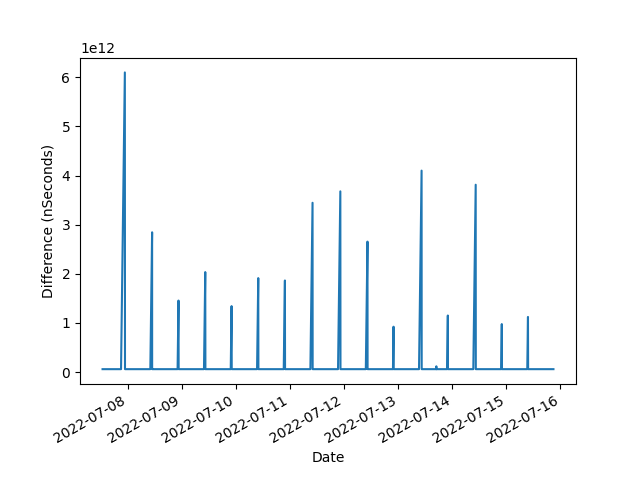

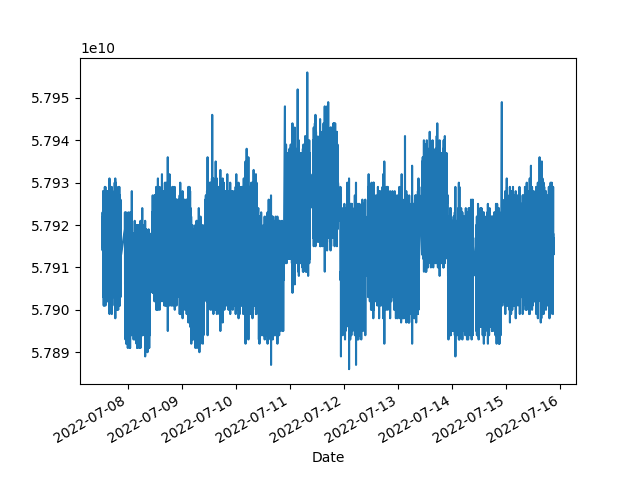

In [3]:
sigTimeArr = np.zeros(11776)
vetoTimeArr = np.zeros(11776)

database = pd.read_hdf('/drBiggerBoy/drData/run1Data/preProcDataSet.hdf5', 'database_DF')
f = h5py.File('/drBiggerBoy/drData/run1Data/preProcDataSet.hdf5', 'r')


measTimes = database.index.to_series()
deltas =measTimes.diff()
#print(measTimes)
#print(deltas)
gaps = deltas[deltas < datetime.timedelta(minutes=1)]
print(gaps.std())
print(gaps.mean())

plt.close('all')
plt.figure()
deltas.plot()
plt.ylabel('Difference (nSeconds)')
plt.figure()
gaps.plot()





-3.976554573411953e-12


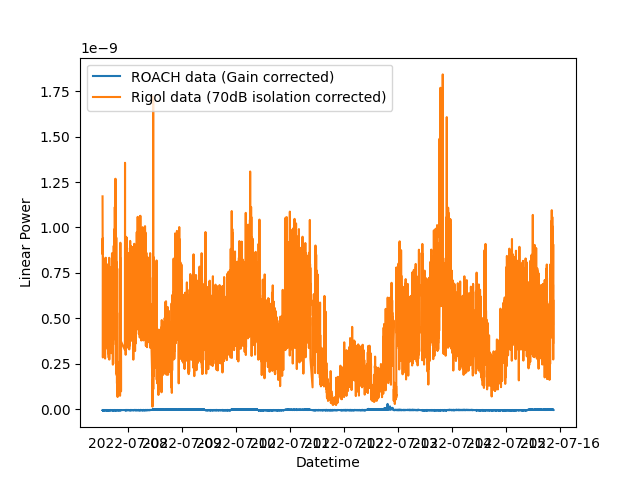

In [4]:
def roachIdx2Rigol(roachIdx):
    numRoachBins    = int(2**23 - 1)
    numRigolBins    = 10000
    rigolIdx        = numRigolBins / numRoachBins * roachIdx
    return int(rigolIdx)

roachIdx = 2866101

for i in range(11776):
    sigTimeArr[i] = f['diffSpec_W'][roachIdx, i]
    vetoTimeArr[i] = f['vetoSpec_W'][roachIdx2Rigol(roachIdx), i]

print(sigTimeArr.mean())

plt.close('all')
plt.figure()
plt.plot(database.index, sigTimeArr, label = 'ROACH data (Gain corrected)')
plt.plot(database.index, vetoTimeArr, label = 'Rigol data (70dB isolation corrected)')
plt.xlabel('Datetime')
plt.ylabel('Linear Power')
plt.legend()


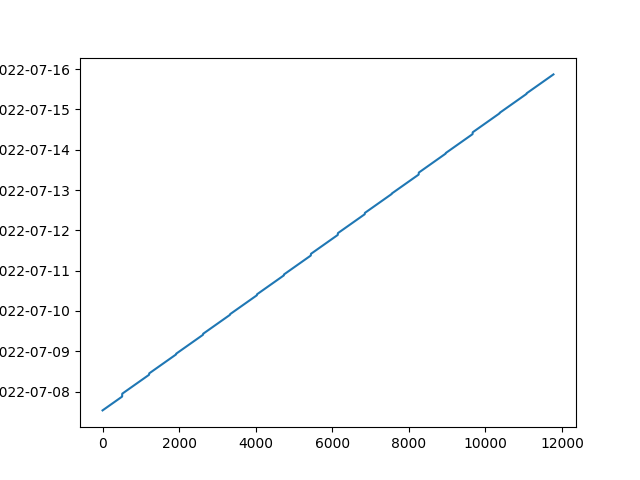

In [5]:
plt.close('all')
plt.figure()
plt.plot(database.index)

In [ ]:
ti = datetime.datetime.now()
test = f[str(i)]['diffSpec_W']
print(datetime.datetime.now() - ti)
print(len(test))
